# TP1 - Classification par Kppv

Dans ce TP, nous allons utiliser une partie de la base de visages “Labeled Faces in the Wild” provenant de http://vis-www.cs.umass.edu/lfw/. Cette base contient 5749 personnes et 13233 images de taille 62 x 47 pixels. Certaines personnes ne sont représentées qu’une seule fois tandis que d’autres sont représentées très souvent (plus de 80 fois). Nous utiliserons ici seulement 7 personnes représentées 1288 fois.

In [2]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA
from time import perf_counter 

## I- Chargement des données:

### Charger les données
Charger les donner, puis afficher les en utilisant la fonction plot_gallery()  fournie.

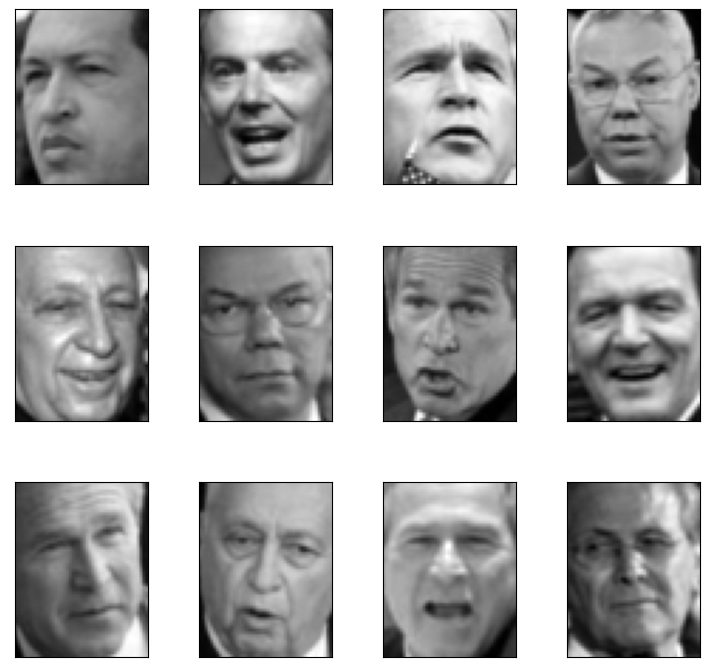

In [3]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb imageNyNx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()
#Charger et afficher les données :
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
plot_gallery(X)

#### Question

- Sachant que X représente les features, y les labels et name le nom des classes, déterminer la taille des images, le nombre d’images et le nombre de classes.

- Retrouver l’identité des 12 personnes affichées. Est-ce que les classes sont équiprobables ? 

- Retrouver le nombre d’exemples par classe. On pourra pour cela utiliser l’histogramme (plt.hist()).

In [12]:
print(X.shape, y.shape, name.shape)
print(y, np.unique(y))


(1288, 62, 47) (1288,) (7,)
[5 6 3 ... 5 3 5] [0 1 2 3 4 5 6]


Il y a 1288 images de taille 62 x 47.
Ces 1288 images ont chacune un label de 0 à 6.

In [16]:
print("The gallery shows the pictures of (in reading order) :")
print(name[y[0:11]])

The gallery shows the pictures of (in reading order) :
['Hugo Chavez' 'Tony Blair' 'George W Bush' 'Colin Powell' 'Ariel Sharon'
 'Colin Powell' 'George W Bush' 'Gerhard Schroeder' 'George W Bush'
 'Ariel Sharon' 'George W Bush']


In [20]:
print("Nombre d'éléments par classe :")
for i in range(7) : 
    print( (y == i).sum() )
print("Ces classes ne sont donc pas équiprobables")

Nombre d'éléments par classe :
77
236
121
530
109
71
144
Ces classes ne sont donc pas équiprobables


### Partitionnement de la base d’apprentissage

Partitionner la base en une base d’apprentissage et une base de test en mettant 25% des données
en test (fonction train_test_split()) pour obtenir les variables X_train, X_test, y_train et y_test.

#### Question
- Combien y a-t-il d’images en train et en test ? 
- Quelles sont les dimensions des quatre variables X_train, X_test, y_train et y_test ?

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(966, 62, 47) (322, 62, 47) (966,) (322,)


Il y a 966 images en train et 322 en test.

Leurs dimensions sont données par les shape ci-dessus

## II. Prétraitement des données:

### Redimensionnement des données

Pour réaliser une classification par kppv, on utilise un codage rétinien. Chaque image est donc représentée par un vecteur de caractéristique de dimension 𝑛 = 2914. Redimensionner X_train et X_test de façon à ce qu’ils aient pour dimension 𝑁 x 𝑛 (np.reshape()) où N est le nombre d’exemples.

In [26]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]) )
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]) )

### Mise en forme des données pour la classification

Mettre en forme les données (train et test) en utilisant la classe StandardScaler. On estimera la moyenne et l’écart-type de chaque dimension sur les données d’apprentissage, puis on transformera les données (train et test) en utilisant ces valeurs. Aller sur la documentation en
ligne de StandardScaler pour voir quelle méthode de cette classe utiliser.

In [43]:
ss_tr=StandardScaler()
x_train_ss=ss_tr.fit_transform(x_train)

ss_te=StandardScaler()
x_test_ss=ss_te.fit_transform(x_test)


#### Question
- A quoi consiste la mise en forme des données ? 

- Comment sont-elles transformées ?

La mise en forme des données consiste à leur donnée une moyenne nulle et un écart-type de 1 en soustrayant la moyenne et en divisant la résultante par l'écart-type.

In [44]:
print(f"Mean before scaling : {np.mean(x_train)},   Mean after : {np.mean(x_train_ss)}")
print(f"Stddev before scaling : {np.std(x_train)}, Stddev after : {np.std(x_train_ss)}")

Mean before scaling : 131.92611694335938,   Mean after : 9.540388479223338e-10
Stddev before scaling : 44.381492614746094, Stddev after : 0.9999998807907104


## III. Classification par les KPPV:

### Classifieur 1PPV

- Définir le classifieur 1PPV en utilisant la classe KNeighborsClassifier(). On souhaite utiliser la distance euclidienne et le 1PPV. 

- Train le classifieur sur X_train, y_train.

- Réaliser la classification des exemples de test en utilisant la méthode predict().

In [99]:
cl_1ppv=KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
cl_1ppv.fit(x_train_ss, y_train)
y_pred=cl_1ppv.predict(x_test_ss)

# cl_1ppv.fit(x_train, y_train)
# y_pred=cl_1ppv.predict(x_test)


#### Questions 
- Que représente la matrice de confusion ?
- Que vaut sa somme ? 
- Est-ce que les classes sont équilibrées ?

La matrice de confusion indique la quantité de classification prédite en chaque classe en fonction de chaque classe réelle.

La somme sur chaque ligne est le nombre d'élément par classe, donc la somme sur les lignes et les colonnes donne le nombre d'éléments au total (dans l'ensemble de test).

In [100]:
co=confusion_matrix(y_test, y_pred)
print(f"Somme de la matrice de confusion : {co.sum()}")

print('\n')
for i in range(7) : 
    print( co[:,i].sum() )
print("Les classes après 1ppv ne sont donc toujours pas équilibrées")

Somme de la matrice de confusion : 322


16
54
36
147
25
10
34
Les classes après 1ppv ne sont donc toujours pas équilibrées


Afficher la matrice de confusion (fonction confusion_matrix()) et estimer le taux dereconnaissance à partir des éléments de cette matrice. Vérifier que le taux est identique à celui renvoyé par la fonction accuracy_score().

In [101]:
print(co)

print(f"Le taux de reconnaissance est de {np.diag(co).sum() / np.sum(co)}.")
print(f"L'accuracy score est de {accuracy_score(y_test, y_pred)}")

[[  6   3   0   8   0   0   1]
 [  1  33   5  10   3   0   3]
 [  1   4  19   4   3   0   4]
 [  4   9   8 108   5   0   5]
 [  0   2   2   3   9   2   6]
 [  0   1   0   5   0   8   2]
 [  4   2   2   9   5   0  13]]
Le taux de reconnaissance est de 0.6086956521739131.
L'accuracy score est de 0.6086956521739131


### Classifieur KPPV
Faire varier le K des KPPV et tracer l’évolution du taux de reconnaissance en fonction de K.

In [106]:
acc_vec=np.zeros(20)
for i in range(1,21): 
    cl_ippv=KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
    cl_ippv.fit(x_train_ss, y_train)
    acc_vec[i-1]=accuracy_score(y_test, cl_ippv.predict(x_test_ss) )

#### Questions :

Conclusion ? Interpréter l’évolution des résultats en fonction de K

Max pour K = 7


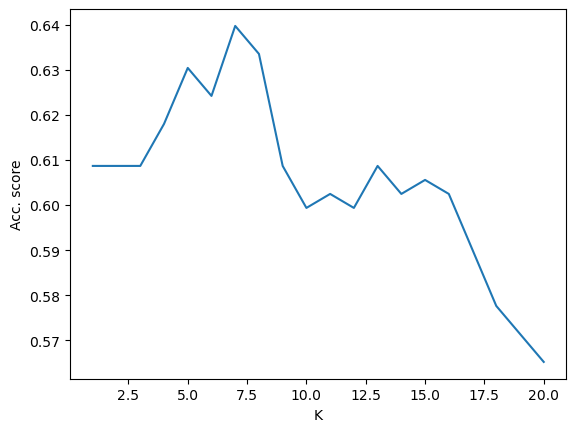

In [107]:
fig=plt.plot(range(1,21), acc_vec)
plt.xlabel('K')
plt.ylabel('Acc. score')
print(f"Max pour K = {np.argmax(acc_vec)+1}")

On voit que l'accuracy est ici maximale quand on regarde les 7 plus proches voisins, et que l'ajout de beaucoup de voisins n'améliore pas la classification.

### Classifieur KPPV et distance de Manhattan

Réaliser les mêmes tests avec la distance de Manhattan.

Max pour K = 3


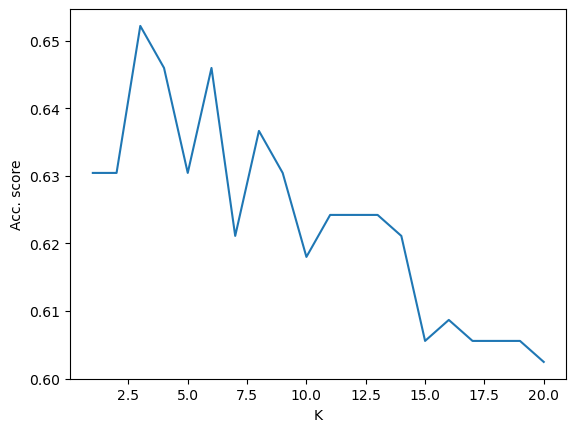

In [108]:
cl_1ppv=KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
cl_1ppv.fit(x_train_ss, y_train)
y_pred=cl_1ppv.predict(x_test_ss)

acc_vec=np.zeros(20)
for i in range(1,21): 
    cl_ippv=KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    cl_ippv.fit(x_train_ss, y_train)
    acc_vec[i-1]=accuracy_score(y_test, cl_ippv.predict(x_test_ss) )
    
fig=plt.plot(range(1,21), acc_vec)
plt.xlabel('K')
plt.ylabel('Acc. score')
print(f"Max pour K = {np.argmax(acc_vec)+1}")

#### Questions :
- Conclusion ? Interpréter l’évolution des résultats en fonction de K.
- Pour résoudre ce problème de classification, quelle distance et valeur de K choisissez-vous suite à ces tests ?

On a maintenant un maximum pour l'accuracy score qui est quasiment le même avec 'manhattan' plutôt qu'avec 'euclidian', mais atteint pour 3 voisins plutôt que 7. 

Je choisirais donc une méthode utilisant la distance de manhattan avec les 3 plus proches voisins.

Cependant, je ne vois pas comment cette méthode est la meilleure. 

# TP2: Analyse en composantes principales, classification et reconstruction :



## I. Chargement et mise en forme des données:

On utilisera les mêmes données que lors du TP1 avec leur redimensionnement et leur mise en forme.

#### Questions

- Combien y a-t-il de données en apprentissage et en test ?
- Quelle est la dimension des données après redimensionnement ?


In [110]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(966, 2914) (322, 2914) (966,) (322,)


## II. Analyse en composantes principales et classification

1. Définissez la décomposition en composantes principales en utilisant la fonction PCA() en gardant le maximum de composantes, ajuster le modèle sur X_train (   ) puis tracer les variances en utilisant l’attribut pca.explained_variance_ratio_  


In [150]:
pca=PCA(n_components=966)
pca.fit(x_train, y_train)

PCA(n_components=966)

Text(0, 0.5, 'Variance')

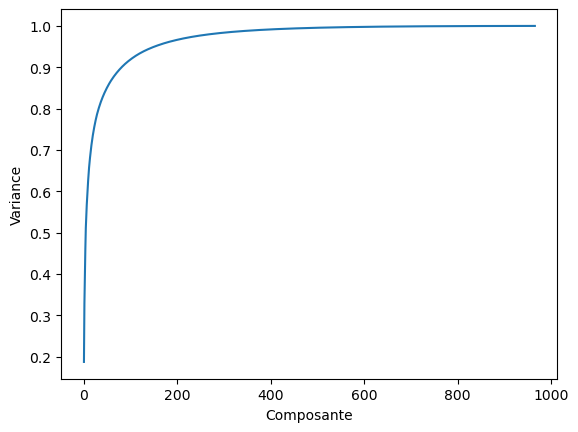

In [151]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Composante')
plt.ylabel('Variance')

2. Redéfinissez la décomposition en utilisant la fonction   en conservant 100 composantes, ajuster le modèle sur X_train, puis transformez les données X_train et X_test pour obtenir X_train1 et X_test1.

In [152]:
pca=PCA(n_components=100)
pca.fit(x_train, y_train)
x_train1=pca.fit_transform(x_train)
x_test1=pca.transform(x_test)

In [153]:
x_test.shape, x_test1.shape, x_train.shape, x_train1.shape

((322, 2914), (322, 100), (966, 2914), (966, 100))

Text(0, 0.5, 'Variance')

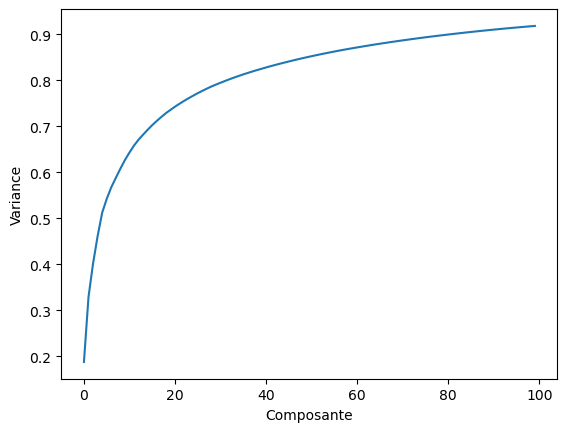

In [154]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Composante')
plt.ylabel('Variance')

3. Réaliser la classification sur les données de départ puis sur les nouvelles données avec la méthode du 5PPV et la distance de Manhattan. Conclure sur le taux de reconnaissance et les temps de calcul qui peuvente être déterminés par :



```
from time import perf_counter
 tps1 = perf_counter()
 tps2 = perf_counter()
 print("Durée de classification",tps2 - tps1)
```



In [142]:
#classification sur les données de base : 
from time import perf_counter

tps1_base = perf_counter()

#On applique standard scale aux données non réduites (bien que déjà fait, pour inclure
# dans le calcul de temps):
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
ss=StandardScaler()
x_test_ss=ss.fit_transform(x_test)

#on fait la classification 5ppv sur les données de base, puis les réduites
cl_5ppv=KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
cl_5ppv.fit(x_train_ss, y_train)
y_pred_base=cl_5ppv.predict(x_test_ss)

tps2_base=perf_counter()

print(f"Temps total : {tps2_base-tps1_base}")
print(f"Accuracy score : {accuracy_score(y_test, y_pred_base)}" )

Temps total 0.5388504820002709
Accuracy score : 0.6304347826086957


In [155]:
#classification sur les données réduites : 
tps1_red = perf_counter()

#On inclue la réduction de dimensions dans le temps
pca=PCA(n_components=100)
pca.fit(x_train, y_train)
x_train1=pca.fit_transform(x_train)
x_test1=pca.transform(x_test)

tps_int_red = perf_counter()

#On applique standard scale à ces données réduites :
ss=StandardScaler()
x_train1_ss=ss.fit_transform(x_train1)
ss=StandardScaler()
x_test1_ss=ss.fit_transform(x_test1)


#on fait la classification 5ppv sur les données de base, puis les réduites
cl_5ppv_red=KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
cl_5ppv_red.fit(x_train1_ss, y_train)
y_pred_red=cl_5ppv_red.predict(x_test1_ss)

tps2_red=perf_counter()

print(f"Temps total {tps2_red-tps1_red}, Temps sans inclure la réduction de dimensions {tps2_red-tps_int_red}")
print(f"Accuracy score : {accuracy_score(y_test, y_pred_red)}" )


Temps total 0.10056694300146773, Temps sans inclure la réduction de dimensions 0.019281921999208862
Accuracy score : 0.6987577639751553


In [163]:
#Classification reports : 
from sklearn.metrics import classification_report
print("Rapport pour la version de base :")
print(classification_report(y_test, y_pred_base))
print('\n')
print("Rapport pour la version à 100 composantes :")
print(classification_report(y_test, y_pred_red))
print('\n')
print(name)
#La réduction de dimension uniformise les precisions, mais pas les recall

Rapport pour la version de base :
              precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.61      0.60      0.61        55
           2       0.82      0.51      0.63        35
           3       0.67      0.89      0.76       139
           4       0.20      0.12      0.15        24
           5       1.00      0.38      0.55        16
           6       0.46      0.37      0.41        35

    accuracy                           0.63       322
   macro avg       0.62      0.46      0.50       322
weighted avg       0.63      0.63      0.61       322



Rapport pour la version à 100 composantes :
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        18
           1       0.77      0.78      0.77        55
           2       0.68      0.37      0.48        35
           3       0.69      0.92      0.79       139
           4       0.67      0.42      0.51        2

#### Questions :

- Que représentent les valeurs renvoyées par pca.explained_variance_ratio_ ? 

- Observer la taille de X_train1 et X_test1. Quelle est la nouvelle dimension des données ?
- Comment varient les temps de calcul entre une classification avec ou sans ACP ?
- Comment varient les taux de reconnaissance ?

pca.explained_variance_ratio_ est "Percentage of variance explained by each of the selected components" d'après la documentation. 

In [164]:
x_test.shape, x_test1.shape, x_train.shape, x_train1.shape

((322, 2914), (322, 100), (966, 2914), (966, 100))

Les nouvelles dimensions ont 100 features au lieu de 2914

Le temps de calculs est plus rapide après réduction (0.10 s. au lieu de 0.53 s.), et l'accuracy score à peu près égale, et même un peu plus élevé (0.69 au lieu de 0.63)

## III. Analyse en composantes principales et reconstruction

Le but est de compresser les images afin qu’elle prenne moins de place en mémoire. On va donc définir sur X_train la façon de compresser. Puis on comprimera et décomprimera les images de X_test afin de voir les pertes induites par la compression.

- Définissez la décomposition en composantes principales en utilisant la fonction PCA() en conservant 50 composantes et ajuster le modèle sur X_train.


- Récupérer les vecteurs propres en utilisant un attribut de PCA(). 

- Redimensionner les vecteurs propres en images propres (np.reshape()) de manière à pourvoir les visualiser sous forme d’images (array de taille 50x62x47). On utilisera la fonction plot_gallery() pour la visualisation.

In [10]:
#On recharge les données pour lancer uniquement les premières cellules et celle-ci.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]) )
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]) )
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(966, 2914) (322, 2914) (966,) (322,)


In [12]:
#Entrainement du modèle
pca=PCA(n_components=50)
pca.fit(x_train, y_train)

#Vecteurs propres :
eigenvec=pca.components_
print(eigenvec)
print('\n')
print(eigenvec.shape)

#Images propres : 
eigenim=np.reshape(eigenvec, (50, 62, 47))

[[-0.00539484 -0.00570086 -0.00638358 ... -0.01069739 -0.00997495
  -0.00931057]
 [ 0.01859924  0.01748544  0.01701865 ... -0.03442015 -0.03455214
  -0.03352232]
 [ 0.01788918  0.01647882  0.01580279 ...  0.04275364  0.03867258
   0.03738027]
 ...
 [ 0.01887458  0.02017824  0.02662604 ...  0.00341664  0.01292538
   0.01975903]
 [-0.02124229 -0.02331815 -0.014675   ... -0.01185411 -0.03434577
  -0.04536716]
 [-0.01731597 -0.02192345 -0.01765944 ...  0.00639158  0.03874633
   0.05688018]]


(50, 2914)


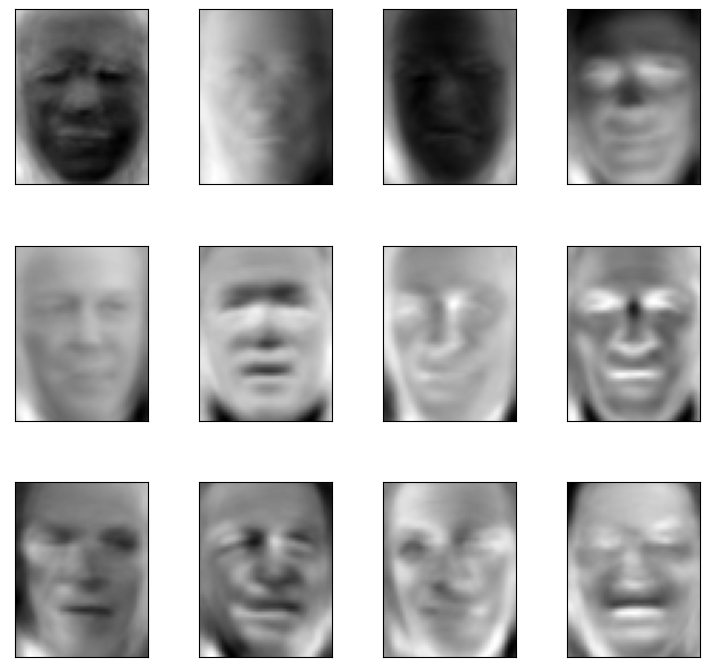

In [17]:
plot_gallery(eigenim) 

Questions:

- Que représentent les vecteurs propres ?
- Quelle est leur taille ?

Les vecteurs propres représentent: 

Les axes principaux dans l'espace d'entités, représentant les directions de variance maximale dans les données. Les composants sont triés par explication_variance_.

Ils sont de même taille que les images de base.

- On souhaite comprimer les images de X_test afin de les transmettre en utilisant le moins de bande passante possible. Pour cela, les 50 images propres sont transmises une fois. Pour chaque nouvelle image, on transmet uniquement ses composantes dans le nouveau système d’axe de dimension 50. L’image est ensuite reconstruite à l’arrivée.
Appliquer l’ACP des images de X_test (X_testC)

In [20]:
x_test_c=pca.transform(x_test)
x_test_c.shape

(322, 50)

- Reconstruisez les images à partir X_testC pour obtenir les images X_testR à partir d’une
des méthodes de PCA(). Afficher les images reconstruites et les comparer visuellement
aux images de départ.

(322, 2914) (322, 2914)


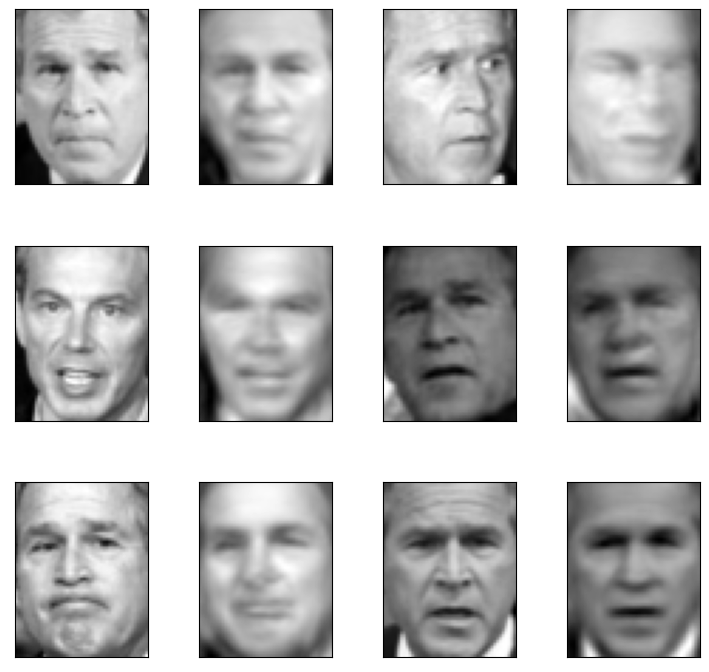

In [36]:
x_test_r=pca.inverse_transform(x_test_c)
print(x_test_r.shape, x_test.shape)

im_test_r=np.reshape(x_test_r, (322, 62,47))
im_test=np.reshape(x_test, (322, 62,47))
im_combined=np.zeros((322*2, 62, 47))
for i in range(322) : 
    im_combined[2*i,:,:]=  im_test[i,:,:]
    im_combined[2*i+1,:,:]=im_test_r[i,:,:]

# plot_gallery(im_test_r)
plot_gallery(im_combined)


-  Comparer les images initiales et reconstruites de manière quantitative en faisant la
moyenne des distances euclidiennes :


```
E= (X_testR-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
```

In [54]:
E= (x_test_r-x_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print(E, np.mean(np.sum(x_test,axis=0)) )
print(f"L'erreur quadratique moyenne est de l'ordre de "+ \
      f"{E/np.mean(np.sum(x_test,axis=0))*100 :0.2f}% des images.")


278.66577 42280.582
L'erreur quadratique moyenne est de l'ordre de 0.66% des images.


Questions: 

- Comparer les tailles de X_test et X_testC et en déduire le taux de compression.
- Observer la taille de X_testR. Quel est le principe de la reconstruction des images ?

- Comment passe-t-on de X_testC à X_testR ?

In [46]:
print(x_test.shape, x_test_c.shape, x_test_r.shape, 1-x_test_c.shape[1]/x_test.shape[1])

(322, 2914) (322, 50) (322, 2914) 0.9828414550446122


On a un taux de compression de 98% en prenant 50 composantes. 

- Faire varier le nombre de composantes conservées de 10 à 950 par pas de 50 et calculer l’erreur de reconstruction. Afficher l’erreur de reconstruction en fonction du nombre de composantes.

In [63]:
vec_err=[]
vec_comp=[]

for i in range(10,1000,50) :
    #Entrainement du modèle
    pca=PCA(n_components=i)
    pca.fit(x_train, y_train)
    #Sélection des composantes majeures
    x_test_c=pca.transform(x_test)
    x_test_c.shape
    #Reconstruction
    x_test_r=pca.inverse_transform(x_test_c)
    E= (x_test_r-x_test)**2
    E = np.mean(np.sqrt(np.sum(E,axis=0)))
    vec_err.append(E)
    vec_comp.append(i)


Text(0, 0.5, 'Erreur quadratique moyenne')

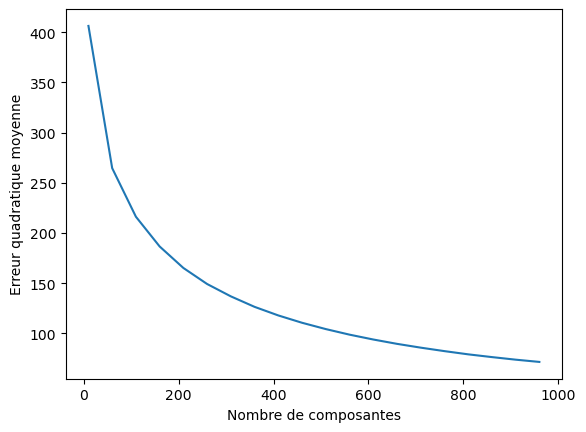

In [64]:
plt.plot(vec_comp, vec_err)
plt.xlabel('Nombre de composantes')
plt.ylabel('Erreur quadratique moyenne')

- Comment varie l’erreur de reconstruction en fonction du nombre de composantes ? 
- Comparer visuellement les images initiales et reconstruites à partir de 950
composantes. Conclusion ?

L'erreur diminue grossièrement en 1 sur le nombre de composantes, donc on peut ignorer les dernières sans trop de pertes.

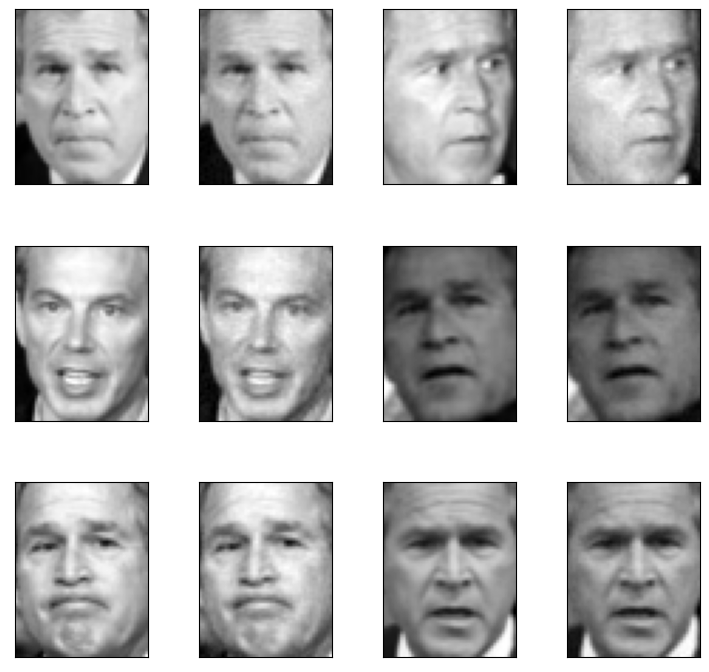

In [65]:
#Entrainement du modèle
pca=PCA(n_components=950)
pca.fit(x_train, y_train)
#Sélection des composantes majeures
x_test_c=pca.transform(x_test)
x_test_c.shape
#Reconstruction
x_test_r=pca.inverse_transform(x_test_c)


im_test_r=np.reshape(x_test_r, (322, 62,47))
im_test=np.reshape(x_test, (322, 62,47))
im_combined=np.zeros((322*2, 62, 47))
for i in range(322) : 
    im_combined[2*i,:,:]=  im_test[i,:,:]
    im_combined[2*i+1,:,:]=im_test_r[i,:,:]

# plot_gallery(im_test_r)
plot_gallery(im_combined)

En supprimant les 15 dernières composantes, les pertes visuelles sont presque imperceptibles, mais on compresse seulement de 1.7%.

# Exemple perso : comparaison à la fft


In [81]:
x_fft=np.fft.rfft2(np.reshape(x_test, (322, 62, 47)))
x_fft.shape

(322, 62, 24)

In [97]:
#approche de base
x_fft[:,20:, 10:]=0
x_fft_r=np.fft.irfft2(x_fft, s=(62, 47))

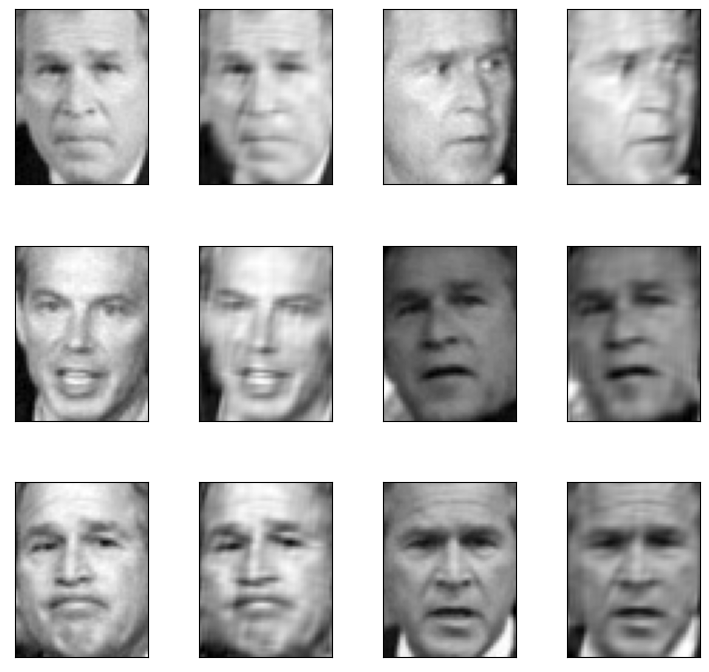

In [98]:
im_combined=np.zeros((322*2, 62, 47))
for i in range(322) : 
    im_combined[2*i,:,:]=  im_test_r[i,:,:]
    im_combined[2*i+1,:,:]=x_fft_r[i,:,:]

# plot_gallery(im_test_r)
plot_gallery(im_combined)


# plot_gallery(x_fft_r)

In [110]:
#calcul de l'erreur avec la compression : 
# On va caractériser le nombre de composantes comme le nombre de termes non nuls dans l'image par fft
#à noter, la fft renvoie un complexe, donc deux fois plus de composantes

vec_err_fft=[]
vec_comp_fft=[] 

im_test=np.reshape(x_test, (322, 62, 47))

for i in range(1, 10) :
    ix=int(np.round(62/10*i))
    iy=int(np.round(47/10*i))
    x_fft=np.fft.rfft2(im_test)
    
    #Sélection des composantes majeures
    x_fft[:,ix:,iy:]=0
    
    #Reconstruction
    x_fft_r=np.fft.irfft2(x_fft, s=(62, 47))
    E= (x_fft_r-im_test)**2
    E = np.mean(np.sqrt(np.sum(E)))
    vec_err_fft.append(E)
    vec_comp_fft.append(ix*iy/(62*47))


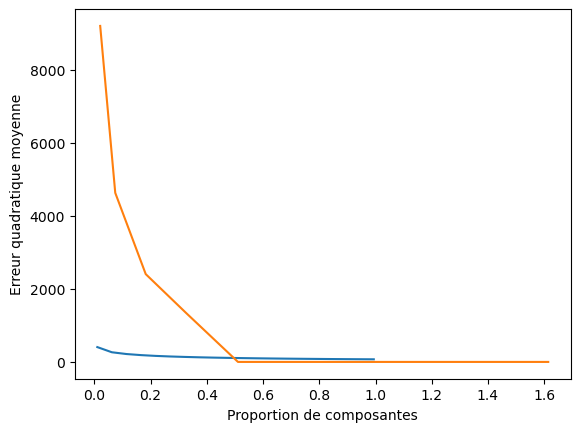

In [109]:
plt.plot(np.divide(vec_comp,966), vec_err)
plt.xlabel('Proportion de composantes')
plt.ylabel('Erreur quadratique moyenne')
plt.plot(np.multiply(vec_comp_fft,2), vec_err_fft)
plt.

In [ ]:
La fft démarre avec une plus grosse erreur, mais finit avec une plus basse erreur.